In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
weights_df = pd.read_csv("../1. Inspect, Clean and Validate Dataset/CleanedData/Cleaned_WeightsAndCalories_IncEstimated.csv")

In [33]:
weights_df

,Date,"Weight, kg",BMI,Body Fat Percentage,Muscle Percentage,RMI,Visceral Fat Percentage,Calories In
0,17/12/2020,49.4,16.7,6.5,45.6,1359.0,1.0,1500.0
1,18/12/2020,49.4,16.7,6.5,45.6,1359.0,1.0,1500.0
2,19/12/2020,49.4,16.7,6.5,45.6,1359.0,1.0,1500.0
3,20/12/2020,51.3,17.2,5.5,47.3,1383.0,1.0,1500.0
4,21/12/2020,51.4,17.2,5.2,47.7,1388.0,1.0,600.0
...,...,...,...,...,...,...,...,...
1358,11/08/2025,66.2,22.4,20.1,40.5,1606.0,5.0,2653.0
1359,12/08/2025,66.5,22.5,19.8,40.8,1614.0,5.0,2786.0
1360,13/08/2025,66.8,22.6,19.5,40.1,1622.0,5.0,2890.0
1361,14/08/2025,67.2,22.7,19.2,41.3,1629.0,5.0,2895.0


In [34]:
weights_df["Body Fat, kg"] = weights_df["Weight, kg"] * weights_df["Body Fat Percentage"] / 100
weights_df["Muscle Mass, kg"] = weights_df["Weight, kg"] * weights_df["Muscle Percentage"] / 100
weights_df["Visceral Fat, kg"] = weights_df["Weight, kg"] * weights_df["Visceral Fat Percentage"] / 100

KG_TO_LBS = 2.2046226218
weights_df["Weight, lbs"] = weights_df["Weight, kg"] * KG_TO_LBS
weights_df["Muscle Mass, lbs"] = weights_df["Muscle Mass, kg"] * KG_TO_LBS
weights_df["Body Fat, lbs"] = weights_df["Body Fat, kg"] * KG_TO_LBS
weights_df["Lean Weight - Body Fat, lbs"] = (weights_df["Muscle Mass, lbs"]-weights_df["Body Fat, lbs"])

In [35]:
weights_df["Body Fat, kg (7d Average)"] = weights_df["Body Fat, kg"].rolling(7).mean()
weights_df["Body Fat, lbs (7d Average)"] = weights_df["Body Fat, lbs"].rolling(7).mean()

weights_df["Muscle Mass, kg (7d Average)"] = weights_df["Muscle Mass, kg"].rolling(7).mean()
weights_df["Muscle Mass, lbs (7d Average)"] = weights_df["Muscle Mass, lbs"].rolling(7).mean()

weights_df["Lean Weight - Body Fat, lbs (7d Average)"] = weights_df["Lean Weight - Body Fat, lbs"].rolling(7).mean()

weights_df["Weight, kg (7d Average)"] = weights_df["Weight, kg"].rolling(7).mean()


[Text(0.0, 0, '17/12/2020'),
 Text(75.0, 0, '02/03/2021'),
 Text(150.0, 0, '16/05/2021'),
 Text(225.0, 0, '30/07/2021'),
 Text(300.0, 0, '13/10/2021'),
 Text(375.0, 0, '27/12/2021'),
 Text(450.0, 0, '12/03/2022'),
 Text(525.0, 0, '10/07/2022'),
 Text(600.0, 0, '15/07/2023'),
 Text(675.0, 0, '28/09/2023'),
 Text(750.0, 0, '12/12/2023'),
 Text(825.0, 0, '25/02/2024'),
 Text(900.0, 0, '10/05/2024'),
 Text(975.0, 0, '24/07/2024'),
 Text(1050.0, 0, '07/10/2024'),
 Text(1125.0, 0, '21/12/2024'),
 Text(1200.0, 0, '06/03/2025'),
 Text(1275.0, 0, '20/05/2025'),
 Text(1350.0, 0, '03/08/2025')]

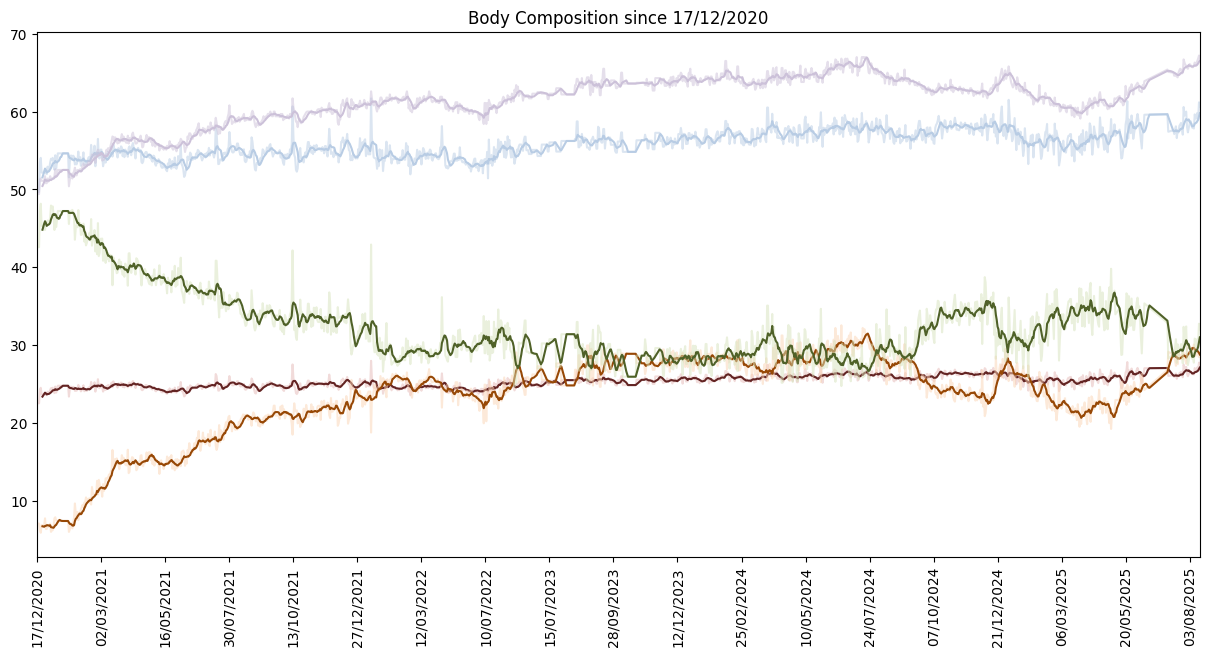

In [36]:
figure = plt.figure(figsize=(15, 15))
ax = figure.add_subplot(2, 1, 1)

x_values = weights_df["Date"]

ax.margins(x=0)

ax.plot(x_values, weights_df["Muscle Mass, lbs"], color="#B8CCE4", alpha=0.5)
ax.plot(x_values, weights_df["Muscle Mass, lbs (7d Average)"], color="#B8CCE4")

ax.plot(x_values, weights_df["Muscle Mass, kg"], color="#E5B9B7", alpha=0.5)
ax.plot(x_values, weights_df["Muscle Mass, kg (7d Average)"], color="#632423")

ax.plot(x_values, weights_df["Body Fat, lbs"], color="#FBD5B5", alpha=0.5)
ax.plot(x_values, weights_df["Body Fat, lbs (7d Average)"], color="#974806")

ax.plot(x_values, weights_df["Lean Weight - Body Fat, lbs"], color="#D7E3BC", alpha=0.5)
ax.plot(x_values, weights_df["Lean Weight - Body Fat, lbs (7d Average)"], color="#4F6128")

ax.plot(x_values, weights_df["Weight, kg"], color="#CCC1D9", alpha=0.5)
ax.plot(x_values, weights_df["Weight, kg (7d Average)"], color="#CCC1D9")

tick_every_x = 75
tick_positions = x_values[::tick_every_x]

ax.set_title(f"Body Composition since {weights_df["Date"][0]}")

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_positions, rotation=90)



In [37]:
ax = figure.add_subplot(2, 1, 2)

zoom_period = 200 # zoom on the last x rows
x_values = weights_df["Date"][-zoom_period:]

ax.margins(x=0)

ax.plot(x_values, weights_df["Muscle Mass, lbs"][-zoom_period:], color="#B8CCE4", alpha=0.5)
ax.plot(x_values, weights_df["Muscle Mass, lbs (7d Average)"][-zoom_period:], color="#B8CCE4")

ax.plot(x_values, weights_df["Muscle Mass, kg"][-zoom_period:], color="#E5B9B7", alpha=0.5)
ax.plot(x_values, weights_df["Muscle Mass, kg (7d Average)"][-zoom_period:], color="#632423")

ax.plot(x_values, weights_df["Body Fat, lbs"][-zoom_period:], color="#FBD5B5", alpha=0.5)
ax.plot(x_values, weights_df["Body Fat, lbs (7d Average)"][-zoom_period:], color="#974806")

ax.plot(x_values, weights_df["Lean Weight - Body Fat, lbs"][-zoom_period:], color="#D7E3BC", alpha=0.5)
ax.plot(x_values, weights_df["Lean Weight - Body Fat, lbs (7d Average)"][-zoom_period:], color="#4F6128")

ax.plot(x_values, weights_df["Weight, kg"][-zoom_period:], color="#CCC1D9", alpha=0.5)
ax.plot(x_values, weights_df["Weight, kg (7d Average)"][-zoom_period:], color="#CCC1D9")

tick_every_x = 5
tick_positions = x_values[::tick_every_x]

ax.set_title(f"Body Composition in the last {zoom_period} days")

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_positions, rotation=90)

ax.legend(["Muscle Mass, lbs (7d Average)", "Muscle Mass, kg (7d Average)", "Body Fat, lbs (7d Average)", "Lean / Body Fat, lbs (7d Average)", "Weight, kg (7d Average)"], loc="upper center", bbox_to_anchor=(0.5, -0.15))

figure.tight_layout()
# plt.show()
figure.savefig("./Charts/Body Composition.png", dpi=500, bbox_inches="tight")